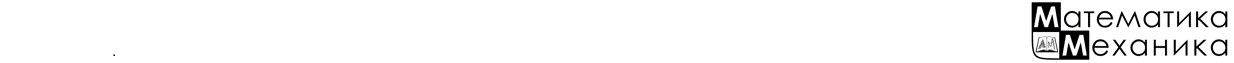

<div style="height:30px"></div>
<h1 align="center">ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ УНИВЕРСИТЕТ</h1>
<h3 align="center">Институт математики, механики и компьютерных наук имени И. И. Воровича</h3>
<div style="height:240px"></div>
<h1 align="center">ИНДИВИДУАЛЬНАЯ РАБОТА № 2<br/> «Вычисления с использованием пакета Numpy»<br/>
по курсу «Технология программирования и практикум на ЭВМ»</h1>
<h3 align="center">По курсу «Технология программирования и практикум на ЭВМ»</h3>
<div style="height:350px"></div>

<p style="text-align:right">
ВЫПОЛНИЛИ: студенты 7 группы 1 курса<br/>
</p>

<ul style="list-style-type: none; text-align:right; padding-bottom:20px">
  <li>Григорян Владислав Артурович</li>
  <li>Докторов Илья Витальевич</li>
  <li>Максименко Виталий Максимович</li>
  <li>Умишов Абу-Висхан Абухусейнович</li>
</ul> 

<p style="text-align:right">
ПРОВЕРИЛ: доцент кафедры теории<br/>
упругости ИММ и КН<br/>
Карякин Михаил Игоревич<br/>
</p>

<div style="margin-top:200px"></div>
<h5 align="center">Ростов-на-Дону, 2022</h5>

## Вариант 9. Самый частый элемент

Дан массив целых положительных чисел, не превосходящих $M=1000$. Определить, какое из чисел 
встречается в массиве чаще всего
Способы решения:
<b>
1. «лобовое» решение на чистом Питоне: определить, сколько раз встречается каждый элемент, из полученных значений выбрать наибольшее
2. с использованием словаря
3. с использованием вспомогательного массива размера M, который инициализируется нулевыми значениями (идея аналогична словарю, только нерациональна в смысле памяти)
4. с использованием функции bincount пакета numpy (нерационально в смысле памяти, но должно быть быстро)
</b>

## Описание способов выполнения задания
<hr>

### Определение общих переменных и импорт зависимостей

In [1]:
%matplotlib inline
from random import randint
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
from itertools import accumulate

# У чисел, среди которых мы будем искать наибольшее
# есть ограничение : это натуральные числа не больше
# M = 1000
M = 1000

# Массивы, используемые при проверки корректности алгоритмов
diverse_test_lst = np.arange(1, 1001)
solid_test_lst = [1] * 600 + [2] * 400
random_test_lst = [randint(1, M + 1) for _ in range(10000)]

initial_array_size = 1000
final_array_size = 10000
step_size = 25
array_sizes = list(range(initial_array_size, final_array_size + 1, step_size))
# Можно, конечно, сразу сгенерировать массивы из случайных элементов для каждого размера,
# но для большей случайности, генерируем их отдельно для каждого из четырех способов

### Первый способ решения

In [2]:
def first_approach_function(lst):
    sorted_lst = sorted(lst)
    counter = 1
    max_counter = 0
    prev_elem = sorted_lst[0]
    for elem in sorted_lst[1:]:
        if elem != prev_elem:
            if counter > max_counter:
                max_counter = counter
                most_frequent_elem = prev_elem
            counter = 0
        counter += 1
        prev_elem = elem
    return most_frequent_elem

### Второй способ решения

In [3]:
def second_approach_function(lst):
    frequency_dict = {}
    for elem in lst:
        corresponding_counter = frequency_dict.get(elem)
        if corresponding_counter is None:
            frequency_dict[elem] = 1
        else:
            frequency_dict[elem] += 1
    return max(frequency_dict, key=lambda key : frequency_dict[key])

In [4]:
def second_approach_function_help(lst):
    frequency_dict = {}
    for elem in lst:
        corresponding_counter = frequency_dict.get(elem)
        if corresponding_counter is None:
            frequency_dict[elem] = 1
        else:
            frequency_dict[elem] += 1
    return [i[1] for i in sorted(list(frequency_dict.items()), key = lambda x : x[0])]

### Третий способ решения

In [5]:
def third_approach_function(lst):
    """
    То же самое, что и через словарь, но
    вместо ключей используются индексы в массиве,
    т.е. элемент 49 - значит прибавляем единицу к
    сорок девятой ячейке, которая была до этого нулем
    (вспомогательный массив инициализируется нулевым)
    """
    auxillary_length = max(lst)
    counter_lst = [0] * auxillary_length
    for i in lst:
        counter_lst[i - 1] += 1
    most_frequent_el = max(counter_lst)
    return counter_lst.index(most_frequent_el) + 1

### Четвертый способ решения
Последний вариант решения основан на встроенной в numpy функции bincount.

In [6]:
def fourth_approach_function(lst):
    np_lst = np.array(lst)
    frequency_lst = np.bincount(np_lst)
    return (np.where(frequency_lst == max(frequency_lst))[0][0])

## Тестирование
<hr>

Сначала подтвердим корректность на очевидных наборах данных, первый из которых однороден, состоит из одних лишь единиц, а во втором единиц больше, чем двоек.
Дальше оценим корректность работы алгоритма на массиве из случайных чисел. Поскольку такую оценку сложно выполнить умозрительно, совершим её, опираясь на график распределения чисел.

#### Проверка корректности первого способа

In [7]:
print(f"{first_approach_function(diverse_test_lst)}")
print(f"{first_approach_function(solid_test_lst)}")

1
1


26


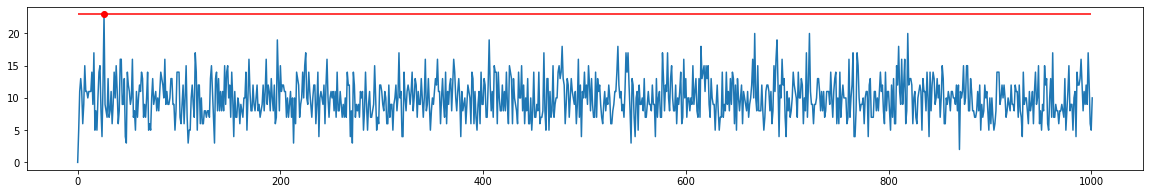

In [8]:
frequency_lst_1 = np.bincount(random_test_lst)
first_appoach_result = first_approach_function(random_test_lst)
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(list(range(len(frequency_lst_1))), frequency_lst_1)
plt.plot(first_appoach_result, frequency_lst_1[first_appoach_result], 'ro')
plt.hlines(frequency_lst_1[first_appoach_result], 0, M, color='r')
print(first_approach_function(random_test_lst))

#### Проверка корректности второго способа

In [9]:
print(f"{second_approach_function(diverse_test_lst)}")
print(f"{second_approach_function(solid_test_lst)}")

1
1


26


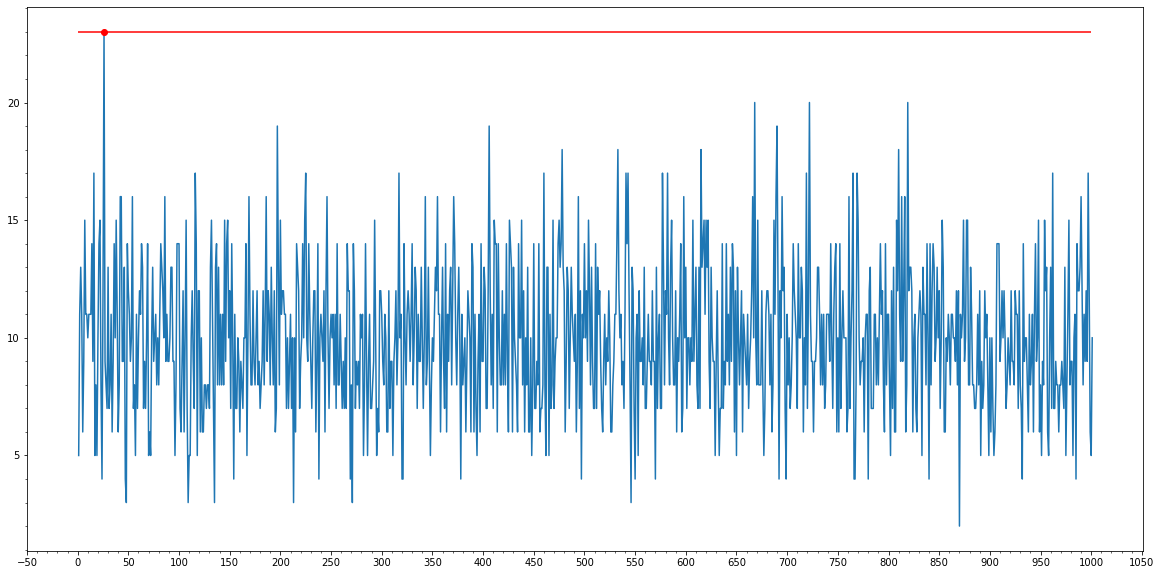

In [10]:
fig1 = plt.figure(figsize=(20,10))
ax = plt.axes()
x = second_approach_function(random_test_lst)
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
freak = second_approach_function_help(random_test_lst)
plt.plot(range(1,len(freak)+1),freak)
plt.plot(x, freak[x-1], 'ro')
#plt.annotate('most frequence number', xytext = (x+6,freak[x-1]) ,xy=(x+3,freak[x-1]),color='r',arrowprops=dict
#             (facecolor = 'blue',shrink=0.1))
plt.hlines(freak[x-1], 0, M, color='r')
print(x)


#### Проверка корректности третьего способа

26


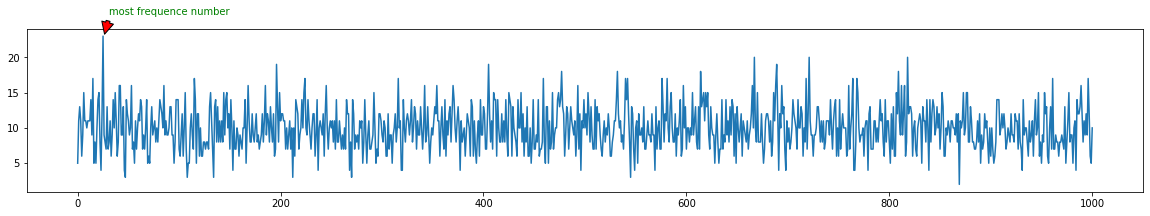

In [11]:
def third_approach_function_assist(lst):
    auxillary_length = max(lst)
    counter_lst = [0] * auxillary_length
    for i in lst:
        counter_lst[i-1] += 1
    return counter_lst    

#test_lst_3 = [randint(1, M + 1) for i in range(10000)]
third_approach_result = third_approach_function(random_test_lst)
frequency_lst_3 = third_approach_function_assist(random_test_lst) 
plt.rcParams["figure.figsize"] = (20,3)
# plt.bar(list(range(len(frequency_lst_3))), frequency_lst_3)
plt.plot(list(range(len(frequency_lst_3))), frequency_lst_3)
plt.annotate('most frequence number', xytext = (third_approach_result+5,frequency_lst_3[third_approach_result-1]+3) ,
             xy=(third_approach_result,frequency_lst_3[third_approach_result-1]),
             color='g',arrowprops=dict(facecolor = 'red',shrink=0.1))
print(third_approach_result)

#### Проверка корректности четвертого способа

In [12]:
print(f"{fourth_approach_function(diverse_test_lst)}")
print(f"{fourth_approach_function(solid_test_lst)}")

1
1


26


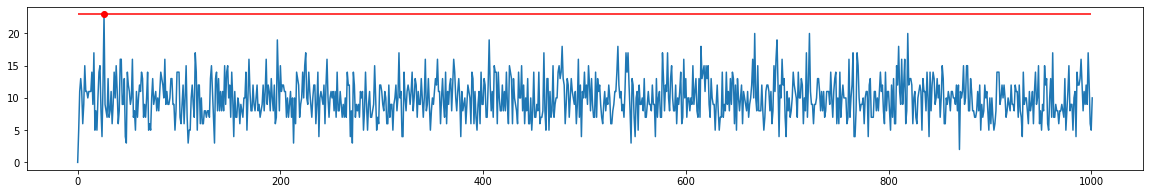

In [13]:
# Найдем частоту вхождения каждого элемента в
# этот массив, используя встроенную функцию, в корректности работы
# которой мы уверены
# У нас в массиве только натуральные числа и есть max значение - то что нужно bincount.
# bincount создает массив
# длиною max (получается, всем возможным элементам массива мы сопоставляем
# ячейку). Например, можем охарактеризовать частотность каждого элемента в
# массиве [1, 1, 3, 5, 3] через bincount следующим образом : 
# [2, 0, 2, 0, 1] - частота вхождения
# [1, 2, 3, 4, 5] - индекс, соответсвующий элементу массива
# т.е. для элемента величиной N его частота хранится в 
# ячейке массива с индексом N - 1
frequency_lst_4 = np.bincount(random_test_lst)
# При помощи написанной нами функции находим самый частый элемент
fourth_appoach_result = fourth_approach_function(random_test_lst)
# Задаем размер графика. Меньше его делать не стоит, поскольку
# могут не отрисоваться значения
plt.rcParams["figure.figsize"] = (20,3)
# Строим график
plt.plot(list(range(len(frequency_lst_4))), frequency_lst_4)
# Ставим найденный нами самый частый элемент. Наша функция возвращает
# только его значение, но не частоту вхождения в массив, за ней 
# обращаемся к тому, что выдал нам прежде bincount
plt.plot(fourth_appoach_result, frequency_lst_4[fourth_appoach_result], 'ro')
plt.hlines(frequency_lst_4[fourth_appoach_result], 0, M, color='r')
print(fourth_appoach_result)

Как видим, все 4 способа выдают корректный результат.

## Исследование скорости
<hr>

Вычисления производились на компьютере со следующими характеристиками:
```yaml
OS: Linuxmint 20.2 uma
Kernel: x86_64 Linux 5.4.0-74-generic
CPU: Intel Pentium N4200 @ 4x 2.5GHz [39.0°C]
GPU: Mesa Intel(R) HD Graphics 505 (APL 3)
RAM: 3043MiB / 7825MiB
```

### Экстенсивный способ
Будем использовать массивы размером в тысячу элементов. Для измерения времени будем пользоваться 

In [20]:
def check(n):
    # Аргумент n - число итераций 
    extinsive_test_lst_size = 1000
    time_1 = 0
    time_2 = 0
    time_3 = 0
    time_4 = 0
        
    for _ in range(n):
        extensive_test_lst = [randint(1, M + 1) for _ in range(extinsive_test_lst_size)]
        
        start_time = time.perf_counter()
        first_approach_function(extensive_test_lst)
        time_1 += time.perf_counter() - start_time
        
        start_time = time.perf_counter()
        second_approach_function(extensive_test_lst)
        time_2 += time.perf_counter() - start_time
        
        start_time = time.perf_counter()
        third_approach_function(extensive_test_lst)
        time_3 += time.perf_counter() - start_time
        
        start_time = time.perf_counter()
        fourth_approach_function(extensive_test_lst)
        time_4 += time.perf_counter() - start_time
    # Возвращаемое время - суммарное для n запусков алгоритма
    return(time_1, time_2, time_3, time_4)

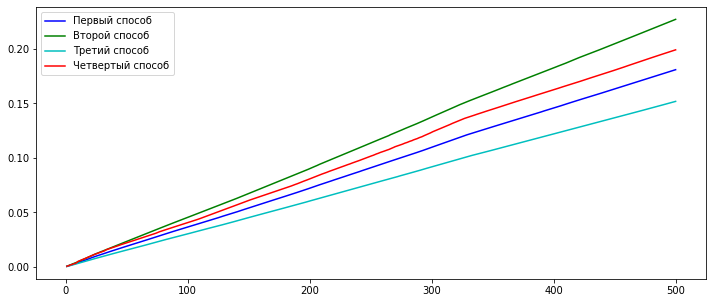

In [22]:
time_1list = []
time_2list = []
time_3list = []    
time_4list = []
test_size = 500
extinsive_test_lst_size = 1000

for _ in range(test_size):
    extensive_test_lst = [randint(1, M + 1) for _ in range(extinsive_test_lst_size)]
        
    start_time = time.perf_counter()
    first_approach_function(extensive_test_lst)
    time_1 = time.perf_counter() - start_time
    time_1list.append(time_1)
        
    start_time = time.perf_counter()
    second_approach_function(extensive_test_lst)
    time_2 = time.perf_counter() - start_time
    time_2list.append(time_2)

    start_time = time.perf_counter()
    third_approach_function(extensive_test_lst)
    time_3 = time.perf_counter() - start_time
    time_3list.append(time_3)
   
    start_time = time.perf_counter()
    fourth_approach_function(extensive_test_lst)
    time_4 = time.perf_counter() - start_time
    time_4list.append(time_4)        
        
extensive_graphic_lst = np.linspace(1,test_size,test_size)
time_1listS = list(accumulate(time_1list))
time_2listS = list(accumulate(time_2list))
time_3listS = list(accumulate(time_3list))
time_4listS = list(accumulate(time_4list))

    
plt.rcParams["figure.figsize"] = (12,5)
plt.plot(extensive_graphic_lst,time_1listS,'b', label="Первый способ")
plt.plot(extensive_graphic_lst,time_2listS,'g', label="Второй способ")
plt.plot(extensive_graphic_lst,time_3listS,'c', label="Третий способ")
plt.plot(extensive_graphic_lst,time_4listS,'r', label="Четвертый способ")
plt.legend()

In [21]:
num_n = [500, 750, 1000, 1500, 2000, 5000]
data = []
for n in num_n:
    data.append(check(n))
data = np.array(data).reshape(len(num_n),4)
main = pd.DataFrame(data,index=num_n,columns=range(1,5))
main

,1,2,3,4
500,0.183366,0.232766,0.155336,0.210763
750,0.262673,0.335047,0.222102,0.288428
1000,0.346854,0.442820,0.296945,0.381226
1500,0.520475,0.664193,0.442989,0.564935
2000,0.690597,0.882657,0.587168,0.771116
5000,1.727780,2.190863,1.464184,1.908416


### Интенсивный способ
Займемся наблюдением за тем, как время выполнения разных способов решения поставленной задачи зависит от количества элементов в массиве.

In [17]:
def get_execution_time(lst_size):
    test_lst = [randint(1, M + 1) for _ in range(lst_size)]
    
    start_time = time.perf_counter()
    first_approach_function(test_lst)
    time_1 = time.perf_counter() - start_time

    start_time = time.perf_counter()
    second_approach_function(test_lst)
    time_2 = time.perf_counter() - start_time

    start_time = time.perf_counter()
    third_approach_function(test_lst)
    time_3 = time.perf_counter() - start_time

    start_time = time.perf_counter()
    fourth_approach_function(test_lst)
    time_4 = time.perf_counter() - start_time
    # Возвращаемое время - суммарное для n запусков алгоритма
    return(time_1, time_2, time_3, time_4)

num_n = [500, 750, 1000, 1500, 2000, 5000]
data = []
for n in num_n:
    data.append(get_execution_time(n))
data = np.array(data).reshape(len(num_n),4)
main = pd.DataFrame(data,index=num_n,columns=range(1,5))
main

,1,2,3,4
500,0.000195,0.000258,0.000188,0.000430
750,0.000288,0.000360,0.000244,0.000684
1000,0.000365,0.000468,0.000311,0.000438
1500,0.000541,0.000666,0.000425,0.000513
2000,0.000707,0.001081,0.000525,0.000553
5000,0.001801,0.002073,0.001269,0.001055


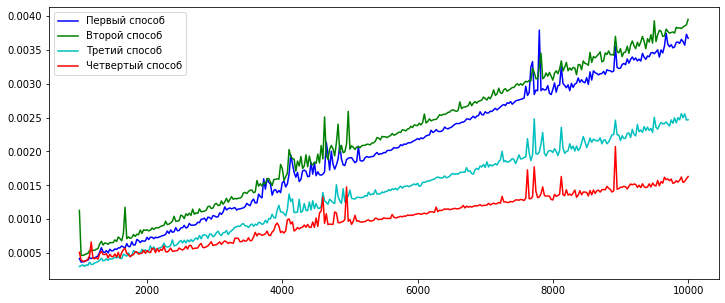

In [27]:
time_distribution_1 = []
time_distribution_2 = []
time_distribution_3 = []
time_distribution_4 = []

for array_size in array_sizes:
    sample_array = [randint(1, M + 1) for _ in range(array_size)]
    
    start_time = time.perf_counter()
    first_approach_function(sample_array)
    finish_time = time.perf_counter()
    delta_time = finish_time - start_time
    time_distribution_1.append(delta_time)
    
    start_time = time.perf_counter()
    second_approach_function(sample_array)
    finish_time = time.perf_counter()
    delta_time = finish_time - start_time
    time_distribution_2.append(delta_time)
    
    start_time = time.perf_counter()
    third_approach_function(sample_array)
    finish_time = time.perf_counter()
    delta_time = finish_time - start_time
    time_distribution_3.append(delta_time)

    start_time = time.perf_counter()
    fourth_approach_function(sample_array)
    finish_time = time.perf_counter()
    delta_time = finish_time - start_time
    time_distribution_4.append(delta_time)

plt.rcParams["figure.figsize"] = (12,5)
plt.plot(array_sizes, time_distribution_1, 'b', label="Первый способ")
plt.plot(array_sizes, time_distribution_2, 'g', label="Второй способ")
plt.plot(array_sizes, time_distribution_3, 'c', label="Третий способ")
plt.plot(array_sizes, time_distribution_4, 'r', label="Четвертый способ")
plt.legend()

## Заключение

#### Вывод 1
Исходя из результатов экстенсивного анализа можно заключить, что для нахождения наиболее частого элемента массива размером в 1000 ячеек при любом количестве вычислений наиболее быстрым является третий алгоритм.

#### Вывод 2
Интенсивный анализ показал, что третий способ оказывается наиболее быстрым, пока число элементов списка не превысит приблизительно 2000. Когда массив оказывается достаточно большим, четвертый алгоритм оказывается кратно быстрее первых трех. Первый же и второй подходы показывают свою неэффективность уже на малых значениях размера массива.